In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import *
from scipy.integrate import odeint

In [70]:
#This function calculates the equilibrium abundance of a particle with bose-einstine  distibution. 
# T is temperature in Gev, M is mass of particle in Gev. 
#for w and Z bosons, M = 80 Gev. 
def Equilibrium_abundance(T,m,g):
    result = quad(lambda p: p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1),0, np.inf)
    Value = ((9/(2*np.pi**2))*result[0])/T**3
    return Value

Equilibrium_abundance(80,80,9)



/tmp/ipykernel_152123/3930679542.py:5: RuntimeWarning: overflow encountered in exp
  result = quad(lambda p: p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1),0, np.inf)


0.8106839724807485

In [50]:
#make Yeq list
Ts= np.logspace(2, 0, 1000)
def Yeq_list(Tlist):
    Yeq = []
    for T in Tlist:
        Yeq.append(Equilibrium_abundance(T, 80,9))
    return Yeq

Yeq_list(Ts)
#print(Yeq)
#for i in Yeq: 
#    if i < 0: 
#        print(i)

/tmp/ipykernel_152123/766907782.py:5: RuntimeWarning: overflow encountered in exp
  result = quad(lambda p: p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1),0, np.inf)


[0.8835484718994613,
 0.8822118190644949,
 0.880868298768827,
 0.8795178928891286,
 0.8781605834676652,
 0.8767963527155864,
 0.8754251830162442,
 0.8740470569285372,
 0.8726619571902853,
 0.871269866721629,
 0.8698707686284578,
 0.8684646462058668,
 0.867051482941638,
 0.8656312625197535,
 0.8642039688239319,
 0.8627695859411932,
 0.8613280981654529,
 0.8598794900011406,
 0.8584237461668478,
 0.8569608515990004,
 0.8554907914555618,
 0.8540135511197586,
 0.8525291162038345,
 0.8510374725528335,
 0.8495386062484055,
 0.8480325036126406,
 0.8465191512119291,
 0.8449985358608473,
 0.8434706446260691,
 0.8419354648303056,
 0.8403929840562648,
 0.8388431901506442,
 0.8372860712281414,
 0.835721615675495,
 0.8341498121555485,
 0.8325706496113365,
 0.8309841172702004,
 0.8293902046479228,
 0.8277889015528896,
 0.8261801980902759,
 0.8245640846662506,
 0.8229405519922118,
 0.8213095910890369,
 0.8196711932913624,
 0.8180253502518819,
 0.8163720539456675,
 0.814711296674511,
 0.813043071071290

In [57]:
#This function calculates lambda in the expression for particle abundance
#where cross_section is particle cross_section, 
#m is mass, 
#gstar, is effective number of relativistic degress of freedom
#degrees of freedom is g 
def Lambda(cross_section,m,gstar,g):
    #planck mass in Gev 
    mpl = 1.220890* 10**19
    Hubble_constant = 1.66*g**(1/2)*(m**2/mpl)
    value = 2*(3.14)**2/45*gstar*((m**3*cross_section)/(Hubble_constant))
    return value
    
Lambda(10**5,80,86.25,9)

7.412642624149934e+26

In [78]:
def model(y,x):
    L = 7.412642624149934e+26
    dydx = -L/np.log(x) * (np.log(y)-Yeq_list(Ts)/np.log(y))
    return dydx

# initial condition
y0 = np.ones(1000)

# time points
x = 80*np.ones(1000)/np.linspace(1000,1,1000)

# solve ODE
y = odeint(model,y0,x)

print(y)

/tmp/ipykernel_152123/3930679542.py:5: RuntimeWarning: overflow encountered in exp
  result = quad(lambda p: p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1),0, np.inf)
/tmp/ipykernel_152123/2130319305.py:3: RuntimeWarning: divide by zero encountered in true_divide
  dydx = -L/np.log(x) * (np.log(y)-Yeq_list(Ts)/np.log(y))


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.8000000000000D-01   r2 =  0.0000000000000D+00
[[ 1.  1.  1. ...  1.  1.  1.]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.8008008008008D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.8000000000000D-01   r2 =  0.8000000000000D-01
 intdy--  t (=r1) illegal        
      in above message,  r1 =  0.8016032064128D-01
      t not in interval tcur - hu (= r1) to tcur (=r2)       
      in above,  r1 =  0.8000000000000D-01   r2 =  0.8000000000000D-01
 lsoda--  trouble from intdy. itask = i1, tout = r1  
      in above message,  i1 =         1
      in above message,  r1 =  0.8016

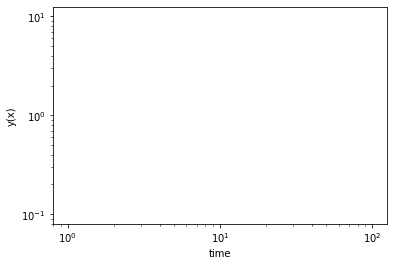

In [75]:
plt.loglog(x,y)
plt.xlabel('time')
plt.ylabel('y(x)')
plt.show()